(dette er skrevet i markdown)

## Cifar datasæt

Dette er et datasæt af 50.000 32x32 farvede trænings billeder og 10.000 test billeder, opdelt i 10 kategorier.

Datasættet kan hentes med koden nedenunder
```python
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
y_train = tf.keras.utils.normalize(y_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
y_test = tf.keras.utils.normalize(y_test,axis=1)

plt.imshow(x_train[0])
plt.show()
```

Prøv ved hjælp af dette startkode at opbyg et neuralt netværk der kan gennemskue kategorierne i test dataen.

```python
from keras import models
from keras import layers
from keras import optimizers

model = model.Sequential()
```

In [95]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

train_images = train_images.reshape(train_images.shape[0],32,32,3)
train_images = train_images.astype('float32')
train_images /= 255

test_images = test_images.reshape(test_images.shape[0],32,32,3)
test_images = test_images.astype('float32')
test_images /= 255


train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [96]:
from keras import models
from keras import layers

# tensorflow model for traning on 32x32 color images
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_images,
                    train_labels,
                    epochs=5,
                    verbose=True,
                    batch_size=64,
                    validation_split=0.1,
                    )


Epoch 1/5
704/704 [==============================] - 18s 24ms/step - loss: 1.6816 - accuracy: 0.3874 - val_loss: 1.7625 - val_accuracy: 0.3874
Epoch 2/5
704/704 [==============================] - 16s 22ms/step - loss: 1.2956 - accuracy: 0.5401 - val_loss: 1.3041 - val_accuracy: 0.5342
Epoch 3/5
704/704 [==============================] - 15s 21ms/step - loss: 1.1082 - accuracy: 0.6114 - val_loss: 1.2936 - val_accuracy: 0.5526
Epoch 4/5
704/704 [==============================] - 15s 22ms/step - loss: 0.9905 - accuracy: 0.6504 - val_loss: 1.1695 - val_accuracy: 0.5950
Epoch 5/5
704/704 [==============================] - 16s 23ms/step - loss: 0.9042 - accuracy: 0.6840 - val_loss: 1.0614 - val_accuracy: 0.6256


313/313 [==============================] - 1s 4ms/step - loss: 1.0920 - accuracy: 0.6163
[1.0920125246047974, 0.6162999868392944]


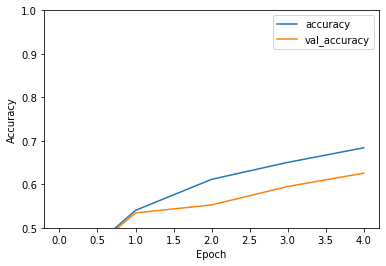

In [97]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

results = model.evaluate(test_images,  test_labels)
print(results)

In [102]:
results = model.evaluate(test_images,test_labels)
print(results)
# find lowest value in list


# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
samples = 20
print(f'\n# Generate predictions for {samples} samples')
predictions = model.predict(test_images[:samples])
for idx ,i in enumerate(predictions):
  if(test_labels[idx][np.argmax(i)] == 1):
    print(idx ," correct  = " , class_names[np.argmax(i)])
  else:
    for id, i in enumerate(test_labels[idx]):
      if(i == 1):
        print(idx ," wrong    = " , class_names[id])


# 313/313 [==============================] - 1s 4ms/step - loss: 0.9913 - accuracy: 0.6810
# [0.9912773370742798, 0.6809999942779541]
# 313/313 [==============================] - 1s 4ms/step - loss: 1.0620 - accuracy: 0.6310
# [1.0619815587997437, 0.6309999823570251]
# 313/313 [==============================] - 1s 4ms/step - loss: 1.0248 - accuracy: 0.6483
# [1.0247641801834106, 0.6482999920845032]

313/313 [==============================] - 1s 4ms/step - loss: 1.0920 - accuracy: 0.6163
[1.0920125246047974, 0.6162999868392944]

# Generate predictions for 20 samples
0  correct  =  cat
1  correct  =  ship
2  wrong    =  ship
3  correct  =  airplane
4  wrong    =  frog
5  correct  =  frog
6  correct  =  automobile
7  correct  =  frog
8  wrong    =  cat
9  correct  =  automobile
10  wrong    =  airplane
11  correct  =  truck
12  wrong    =  dog
13  correct  =  horse
14  correct  =  truck
15  wrong    =  ship
16  correct  =  dog
17  wrong    =  horse
18  correct  =  ship
19  correct  =  frog
